### Aim
Explore A/B test dataset results and test statistical significance of outcomes

### 1) Importing and preparing data

In [1]:
import pandas as pd

# Importing data from csv
df = pd.read_csv(r'C:\Users\emile\OneDrive\Documents\GitHub\ab-test\data.csv')

# Selecting data of initial interest - i.e. those related to venue searches, enquiries etc.
ven_df = df[['testVariant', 'finOnb', 'venSearch', 'venViews', 'venEnq']].copy()
ven_df.head()

,testVariant,finOnb,venSearch,venViews,venEnq
0,0,1,0,0,0
1,1,1,0,0,0
2,2,1,14,16,1
3,1,1,4,4,0
4,0,1,0,0,0


In [2]:
# Converting to boolean for > 0
# Not interested at this stage about volumes, just whether a search/enquiry etc. was made

bool_col_list = ven_df.columns[1:]
ven_df[bool_col_list] = ven_df[bool_col_list].astype('bool')
ven_df.head()

,testVariant,finOnb,venSearch,venViews,venEnq
0,0,True,False,False,False
1,1,True,False,False,False
2,2,True,True,True,True
3,1,True,True,True,False
4,0,True,False,False,False


In [3]:
# Group by test variant and calculate conversion rate

var_groupby = ven_df.groupby('testVariant')
var_conv_df = var_groupby.sum() * 100 / var_groupby.count()
var_conv_df.head()

,finOnb,venSearch,venViews,venEnq
testVariant,,,,
0,91.311755,57.069847,45.996593,19.420784
1,90.909091,52.188552,43.771044,20.875421
2,93.413174,64.071856,54.491018,20.359281


### 2) Visualising dataset

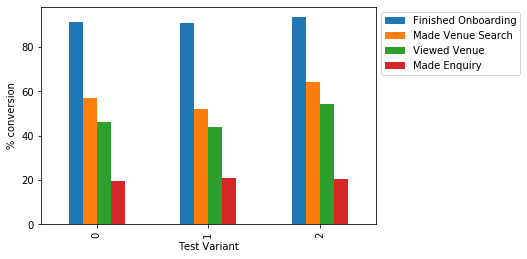

In [7]:
import matplotlib.pyplot as plt

# Plotting conversion rates of different stages for test variants
var_conv_df.plot(kind='bar')
legend = plt.legend(['Finished Onboarding', 'Made Venue Search', 'Viewed Venue', 'Made Enquiry'],
                    bbox_to_anchor = (1,1))
xlab = plt.xlabel('Test Variant')
ylab = plt.ylabel('% conversion')
plt.show()

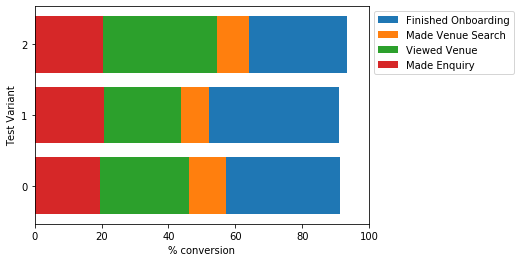

In [5]:
# Plotting an overlayed horizontal bar chart
# for easier comparison of test performance
plt.barh(var_conv_df.index, var_conv_df.finOnb, tick_label=[0,1,2])
plt.barh(var_conv_df.index, var_conv_df.venSearch, tick_label=[0,1,2])
plt.barh(var_conv_df.index, var_conv_df.venViews, tick_label=[0,1,2])
plt.barh(var_conv_df.index, var_conv_df.venEnq, tick_label=[0,1,2])

xlab = plt.xlabel('% conversion')
ylab = plt.ylabel('Test Variant')
plt.xlim(0,100)
legend = plt.legend(['Finished Onboarding', 'Made Venue Search', 'Viewed Venue', 'Made Enquiry'],
                    bbox_to_anchor = (1,1))
plt.show()

### 3) Performing Hypothesis Tests

#### Method:
Null hypothesis:
    
    Conversion rate to a given stage of user interaction is not increased for the variant.

Permutation test:
    
    Significance level of 0.05 used throughout

    Test statistic - conversion rate differential between the variant and control group.

    Data for given variant combined with the control variant and resampled many times (10000 samples being take in this case) to produce a distribution of values for the test statistic (permutation replicates).
    Looking at the proportion of permutation replicates at least as extreme as the actual observed value of our test statistic, we calculate a p-value for the test and determine whether we can reject the assumption made by the null hypothesis at the 0.05 significance level.

In [6]:
import bridebook_functions as bf

# Split boolean dataframe ven_df by test variant
var0_df = ven_df[ven_df['testVariant'] == 0]
var1_df = ven_df[ven_df['testVariant'] == 1]
var2_df = ven_df[ven_df['testVariant'] == 2]

# Choosing significance level
a = 0.05

# Performing hypothesis test for each variable of each test variant
for df in [var1_df, var2_df]:
    
    print(f'\nTest Variant {df.iloc[0][0]} :')
    
    for col in df.columns[1:] :

        # Calculate p-value from permutation test
        p_val = bf.permutation_test(var0_df[col],
                                    df[col],
                                    bf.conv_diff)
        
        print(f'\n\t{col}, p-value : {p_val}')
        
        if p_val < a:
        
            print(
                f'''\n\tReject null hypothesis at {a} significance level
        We may conclude that {col} has increased in a statistically 
        significant way by switching to test variant {df.iloc[0][0]}''')
        else:
            print(
                f'''\n\tUnable to reject the null hypothesis at {a} significance level
        We can not be sure that {col} has increased in a statistically
        significant way by switching to test variant {df.iloc[0][0]}''')     
    



Test Variant 1 :

	finOnb, p-value : 0.6203

	Unable to reject the null hypothesis at 0.05 significance level
        We can not be sure that finOnb has increased in a statistically
        significant way by switching to test variant 1

	venSearch, p-value : 0.928

	Unable to reject the null hypothesis at 0.05 significance level
        We can not be sure that venSearch has increased in a statistically
        significant way by switching to test variant 1

	venViews, p-value : 0.7512

	Unable to reject the null hypothesis at 0.05 significance level
        We can not be sure that venViews has increased in a statistically
        significant way by switching to test variant 1

	venEnq, p-value : 0.3292

	Unable to reject the null hypothesis at 0.05 significance level
        We can not be sure that venEnq has increased in a statistically
        significant way by switching to test variant 1

Test Variant 2 :

	finOnb, p-value : 0.2431

	Unable to reject the null hypothesis at 0.05 s